In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import layers
from keras import models
from keras import optimizers
from random import shuffle, randint
import numpy as np

import matplotlib.pyplot as plt
import os, shutil
from keras.models import load_model, model_from_json
from pathlib import Path

In [4]:
def make_dir_helper(dir_path):
    if not os.path.exists(dir_path):
        os.mkdir(dir_path)
        return True
    return False

In [5]:
original_dataset_dir = os.path.join(os.path.expanduser('~'),'Desktop', 'EsriProject', 'original data');
base_dir =  os.path.join(os.path.expanduser('~'), 'Desktop', 'Esri Project', 'data');
base_scripts_dir =  os.path.join(os.path.expanduser('~'), 'Desktop', 'EsriProject', 'scripts');

MODEL_FILE_NAME = 'building_model_multi.h5'
CLASSES_TO_CLASSIFY = ['Airplane', 'Beach', 'Buildings', 'Forest', 'Freeway', 'Parkinglot']
ext = '.jpg'
IMAGE_SIZE = 256
EPOCHS = 35
NO_TRAINING_SAMPLES = 70
BATCH_SIZE = 15
STEPS_PER_EPOCH = 5

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

make_dir_helper(base_dir)

# Make base directories
make_dir_helper(train_dir)
make_dir_helper(validation_dir)
make_dir_helper(test_dir)

for classes in CLASSES_TO_CLASSIFY:
    
    train_class_dir = os.path.join(train_dir, classes)
    validation_class_dir = os.path.join(validation_dir, classes)
    test_class_dir = os.path.join(test_dir, classes)
    
    # Make train sub directories
    make_dir_helper(train_class_dir)
    make_dir_helper(validation_class_dir)
    make_dir_helper(test_class_dir)
    
    fnames = [(classes + '{}' + ext).format(i) for i in range(NO_TRAINING_SAMPLES)]
    for fname in fnames:
        src_dir = os.path.join(original_dataset_dir, fname)
        dst_dir = os.path.join(train_class_dir, fname)
        shutil.copyfile(src_dir, dst_dir)

    # Copy building into the validation dataset
    fnames = [(classes + '{}' + ext).format(i) for i in range(NO_TRAINING_SAMPLES, 100)]
    for fname in fnames:
        src_dir = os.path.join(original_dataset_dir, fname)
        dst_dir = os.path.join(validation_class_dir, fname)
        shutil.copyfile(src_dir, dst_dir)

    # Copy building into the test dataset
    fnames = [(classes + '{}' + ext).format(i) for i in range(NO_TRAINING_SAMPLES, 100)]
    for fname in fnames:
        src_dir = os.path.join(original_dataset_dir, fname)
        dst_dir = os.path.join(test_class_dir, fname)
        shutil.copyfile(src_dir, dst_dir)

model_file_path = os.path.join(base_scripts_dir, MODEL_FILE_NAME);
print(model_file_path)

C:\Users\thom8982\Desktop\Esri Project\scripts\building_model_multi.h5


In [6]:
is_model_from_file = False
model_file = Path(model_file_path)
model = None
if model_file.is_file():
    print('found model!')
    model = load_model(model_file_path)
    is_model_from_file = True
else:
    print('No saved model')

found model!


In [7]:
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       vertical_flip=True,
                                       horizontal_flip=True)  
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
            train_dir,  
            target_size=(IMAGE_SIZE, IMAGE_SIZE),  
            batch_size=20,
            class_mode='categorical')  

    validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(IMAGE_SIZE, IMAGE_SIZE),
            batch_size=20,
            class_mode='categorical')

Found 420 images belonging to 6 classes.
Found 200 images belonging to 6 classes.


In [8]:
    for idx, (data_batch, labels_batch) in enumerate(train_generator):
        print('data batch:', data_batch.shape)
        print('labels batch:', labels_batch.shape)

        if idx > 3:
            break

data batch: (20, 256, 256, 3)
labels batch: (20, 6)
data batch: (20, 256, 256, 3)
labels batch: (20, 6)
data batch: (20, 256, 256, 3)
labels batch: (20, 6)
data batch: (20, 256, 256, 3)
labels batch: (20, 6)
data batch: (20, 256, 256, 3)
labels batch: (20, 6)


In [21]:
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
   
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
   
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
   
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))

In [22]:
model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 258, 258, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 130, 130, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 66, 66, 64)        0         
__________

Epoch 1/40
10/10 [==============================] - 24s - loss: 1.7914 - acc: 0.1550 - val_loss: 1.7625 - val_acc: 0.1500
Epoch 2/40
10/10 [==============================] - 16s - loss: 1.7513 - acc: 0.2050 - val_loss: 1.7360 - val_acc: 0.1500
Epoch 3/40
10/10 [==============================] - 16s - loss: 1.6824 - acc: 0.2700 - val_loss: 1.5706 - val_acc: 0.4000
Epoch 4/40
10/10 [==============================] - 16s - loss: 1.5555 - acc: 0.3850 - val_loss: 1.4687 - val_acc: 0.3350
Epoch 5/40
10/10 [==============================] - 16s - loss: 1.3738 - acc: 0.4700 - val_loss: 1.4104 - val_acc: 0.3300
Epoch 6/40
10/10 [==============================] - 16s - loss: 1.3869 - acc: 0.4950 - val_loss: 1.2853 - val_acc: 0.5150
Epoch 7/40
10/10 [==============================] - 16s - loss: 1.2719 - acc: 0.5500 - val_loss: 1.2038 - val_acc: 0.5100
Epoch 8/40
10/10 [==============================] - 16s - loss: 1.2179 - acc: 0.5750 - val_loss: 1.2172 - val_acc: 0.5350
Epoch 9/40
10/10 [======

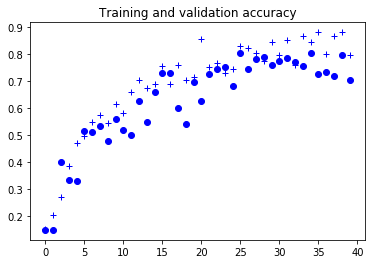

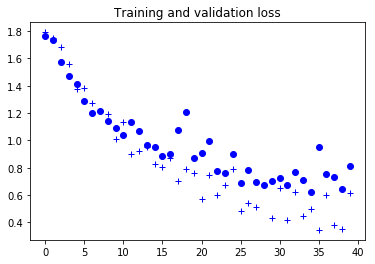

In [24]:
if not is_model_from_file:
    history = model.fit_generator(
          train_generator,
          steps_per_epoch=10,
          epochs=EPOCHS,
          validation_data=validation_generator,
          validation_steps=10)

    model.save(MODEL_FILE_NAME) 

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b+')
    plt.plot(epochs, val_acc, 'bo')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, 'b+')
    plt.plot(epochs, val_loss, 'bo')
    plt.title('Training and validation loss')

    plt.show()

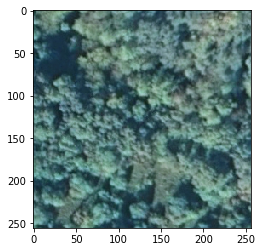

[[ 0.  0.  0.  0.  1.  0.]]
Freeway


In [49]:
fnames = []
dnames = [os.path.join(test_dir, dname) for dname in os.listdir(test_dir)]
for dname in dnames:
    fnames.extend([os.path.join(dname, fname) for fname in os.listdir(dname)])
fnames
shuffle(fnames)
img_path = fnames[randint(0, len(fnames))]

img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
imgplot = plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
prediction = model.predict(x)
print(prediction)

print(CLASSES_TO_CLASSIFY[np.argmax(prediction)])